<a href="https://colab.research.google.com/github/DobiIsFree/gongboohater/blob/main/HW03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Prepare Datasets

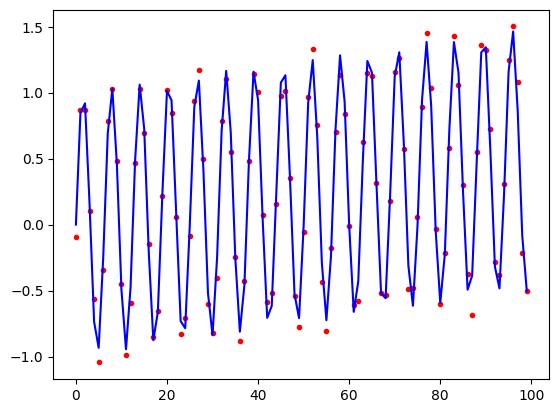

In [30]:
data_len = 1000

data_time_series = np.sin(np.arange(data_len)) + np.random.normal(0, 0.1, data_len) + np.arange(data_len)/200

plt.plot(data_time_series[0:100], 'r.')
plt.plot(range(100), np.sin(np.arange(100)) + np.arange(100)/200, 'b')
plt.show()

In [31]:
data_matrix = []
seq_len = 3

for i in range(0, data_len-seq_len):
  tmp_data = data_time_series[i: i+seq_len+1]
  data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(997, 4)
[[-0.09598925  0.87220779  0.87096458  0.10453411]
 [ 0.87220779  0.87096458  0.10453411 -0.56771749]
 [ 0.87096458  0.10453411 -0.56771749 -1.04505789]
 ...
 [ 6.08788206  5.5391702   4.96078073  4.12625374]
 [ 5.5391702   4.96078073  4.12625374  4.20973172]
 [ 4.96078073  4.12625374  4.20973172  4.94876181]]


## Split Train/Test set

In [33]:
x = data_matrix_np[:, 0:seq_len]
y = data_matrix_np[:, seq_len]
print(x.shape)
print(y.shape)

n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(y_train.shape)


(997, 3)
(997,)
(750, 3)
(750,)


# MLP model

In [29]:
from keras import layers, models

input_shape = (seq_len, )

mlp_seq = models.Sequential()
mlp_seq.add(layers.Dense(units = 5, activation = 'tanh', input_shape=input_shape))
mlp_seq.add(layers.Dense(units = 10, activation = 'tanh'))
mlp_seq.add(layers.Dense(units = 1, activation = 'linear'))

mlp_seq.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
mlp_seq.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 5)                 20        
                                                                 
 dense_9 (Dense)             (None, 10)                60        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = mlp_seq.fit(x_train, y_train,
                      validation_data = [x_test, y_test], batch_size=16, epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 7ms/step - loss: 4.0634 - mean_squared_error: 4.0634 - val_loss: 11.7523 - val_mean_squared_error: 11.7523
Epoch 2/100
47/47 [==============================] - 0s 5ms/step - loss: 2.2190 - mean_squared_error: 2.2190 - val_loss: 7.3821 - val_mean_squared_error: 7.3821
Epoch 3/100
47/47 [==============================] - 0s 5ms/step - loss: 1.5091 - mean_squared_error: 1.5091 - val_loss: 5.5544 - val_mean_squared_error: 5.5544
Epoch 4/100
47/47 [==============================] - 0s 5ms/step - loss: 1.1790 - mean_squared_error: 1.1790 - val_loss: 4.6842 - val_mean_squared_error: 4.6842
Epoch 5/100
47/47 [==============================] - 0s 4ms/step - loss: 0.9778 - mean_squared_error: 0.9778 - val_loss: 4.1377 - val_mean_squared_error: 4.1377
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 0.8598 - mean_squared_error: 0.8598 - val_loss: 3.7623 - val_mean_squared_error: 3.7623
Epoch 7/100
47/47 [=============

## Validation

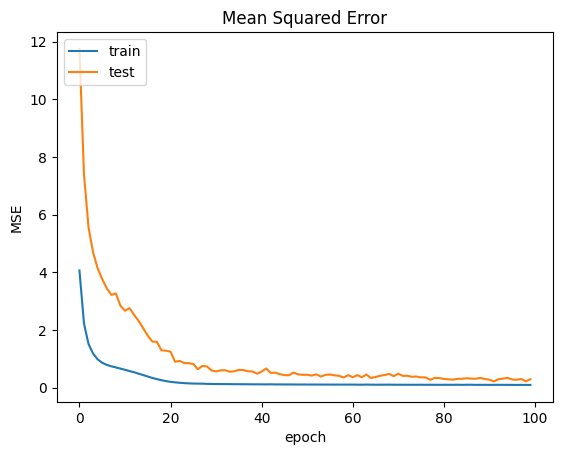

In [31]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 2ms/step


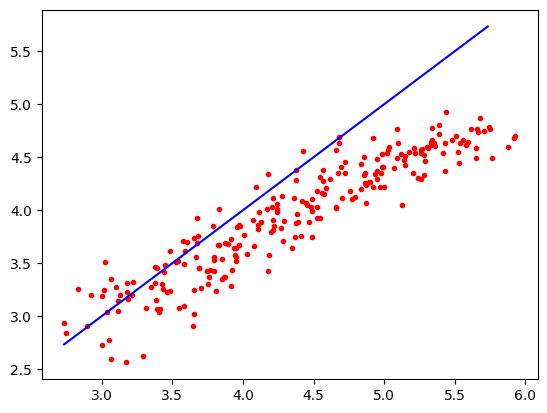

In [32]:
plt.plot(y_test, mlp_seq.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)), np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 2ms/step


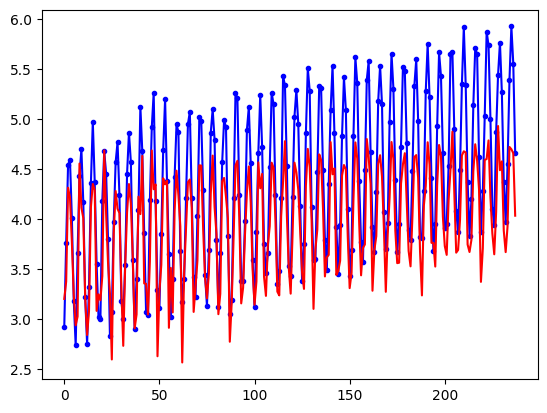

In [33]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), mlp_seq.predict(x_test), 'r-')
plt.show()

- 예측값 증가하지 X, sequential 처리 필요

#LSTM (many to many)

: Time-series data prediction

## Data preprocessing

In [35]:
rnn_sequence_len = 4
data_dim = 3

x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim]

print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
y = np.reshape(y, (-1, rnn_sequence_len, 1))
print(x.shape)
print(y.shape)

(996, 3)
(996,)
(249, 4, 3)
(249, 4, 1)


## Split train/test set

In [11]:
n_train_data = 200

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 4, 3)
(49, 4, 3)
(200, 4, 1)
(49, 4, 1)


## Keras functional API

50개의 뉴런과 4개의 hidden layer로 이루어진 LSTM

In [12]:
input_shape = (x_train[0].shape)

input = layers.Input(input_shape)
rnn_layer1 = layers.LSTM(50, return_sequences=True)(input)
rnn_layer2 = layers.LSTM(50, return_sequences=True)(rnn_layer1)
rnn_layer3 = layers.LSTM(50, return_sequences=True)(rnn_layer2)
rnn_layer4 = layers.LSTM(50, return_sequences=True)(rnn_layer3)
output= layers.TimeDistributed(layers.Dense(1, activation='linear'))(rnn_layer4)

rnn_func = models.Model(input, output)

rnn_func.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
rnn_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm (LSTM)                 (None, 4, 50)             10800     
                                                                 
 lstm_1 (LSTM)               (None, 4, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 4, 50)             20200     
                                                                 
 lstm_3 (LSTM)               (None, 4, 50)             20200     
                                                                 
 time_distributed (TimeDistr  (None, 4, 1)             51        
 ibuted)                                                         
                                                             

In [13]:
history = rnn_func.fit(x_train, y_train,
                        validation_data=[x_test, y_test], batch_size=16, epochs=100)

Epoch 1/100
13/13 [==============================] - 10s 122ms/step - loss: 5.5907 - mean_squared_error: 5.5907 - val_loss: 17.9050 - val_mean_squared_error: 17.9050
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 3.6693 - mean_squared_error: 3.6693 - val_loss: 8.2523 - val_mean_squared_error: 8.2523
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 2.7999 - mean_squared_error: 2.7999 - val_loss: 9.3039 - val_mean_squared_error: 9.3039
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 2.4685 - mean_squared_error: 2.4685 - val_loss: 7.9311 - val_mean_squared_error: 7.9311
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 2.1727 - mean_squared_error: 2.1727 - val_loss: 6.5141 - val_mean_squared_error: 6.5141
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 1.9243 - mean_squared_error: 1.9243 - val_loss: 6.0119 - val_mean_squared_error: 6.0119
Epoch 7/100
13/13 [=====

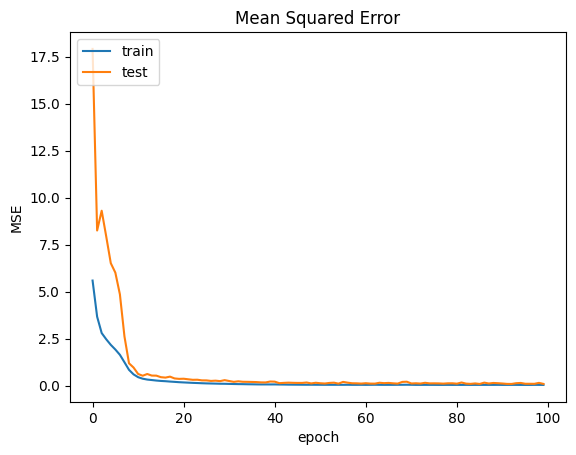

In [14]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2/2 [==============================] - 1s 6ms/step


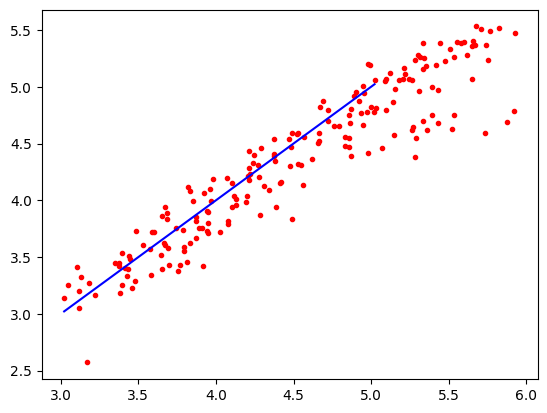

In [15]:
y_test_reshape = np.reshape(y_test, (-1, 1))
plt.plot(y_test_reshape, np.reshape(rnn_func.predict(x_test), (-1,1)), 'r.')
plt.plot(np.arange(min(y_test_reshape), max(y_test_reshape)),
         np.arange(min(y_test_reshape), max(y_test_reshape)), 'b')
plt.show()

2/2 [==============================] - 0s 6ms/step


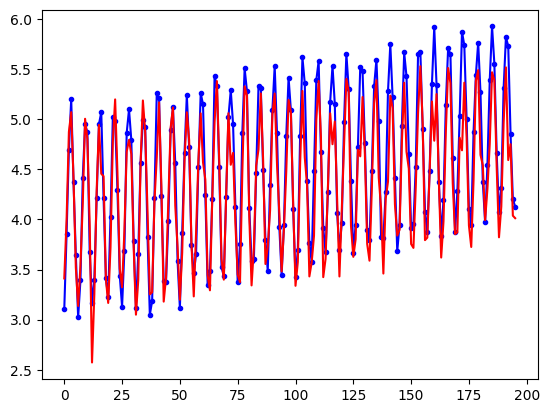

In [16]:
plt.plot(range(y_test_reshape.shape[0]), y_test_reshape, 'b.-')
plt.plot(range(y_test_reshape.shape[0]), np.reshape(rnn_func.predict(x_test), (-1, 1)), 'r-')
plt.show()

# LSTM (many to one)

## Data preprocessing

In [36]:
data_matrix = []

for i in range(0, data_len-data_dim*rnn_sequence_len):
  tmp_data = data_time_series[i:i+data_dim*rnn_sequence_len+1]
  data_matrix.append(tmp_data)

data_matrix_np = np.array(data_matrix)
print(data_matrix_np.shape)
print(data_matrix_np)

(988, 13)
[[-0.09598925  0.87220779  0.87096458 ... -0.4490752  -0.9891434
  -0.59100538]
 [ 0.87220779  0.87096458  0.10453411 ... -0.9891434  -0.59100538
   0.46419368]
 [ 0.87096458  0.10453411 -0.56771749 ... -0.59100538  0.46419368
   1.02739054]
 ...
 [ 3.79411198  4.43928751  5.48330946 ...  5.5391702   4.96078073
   4.12625374]
 [ 4.43928751  5.48330946  5.91908373 ...  4.96078073  4.12625374
   4.20973172]
 [ 5.48330946  5.91908373  5.53525136 ...  4.12625374  4.20973172
   4.94876181]]


In [37]:
x = data_matrix_np[0:data_matrix_np.shape[0]-1, 0:data_dim*rnn_sequence_len]
y = data_matrix_np[0:data_matrix_np.shape[0]-1, data_dim*rnn_sequence_len]
print(x.shape)
print(y.shape)

x = np.reshape(x, (-1, rnn_sequence_len, data_dim))
print(x.shape)

(987, 12)
(987,)
(987, 4, 3)


## Split train/test set

In [38]:
n_train_data = 750

x_train = x[0:n_train_data, :]
y_train = y[0:n_train_data]
x_test = x[n_train_data:x.shape[0], :]
y_test = y[n_train_data:y.shape[0]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 4, 3)
(237, 4, 3)
(750,)
(237,)


In [39]:
print(x_train[0].shape)

(4, 3)


## Keras functional API

In [20]:
input_shape = (x_train[0].shape)

input = layers.Input(input_shape)
rnn_layer = layers.LSTM(10, return_sequences=False)(input)
output= layers.Dense(1, activation='linear')(rnn_layer)

rnn_mto1_func = models.Model(input, output)

rnn_mto1_func.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
rnn_mto1_func.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 3)]            0         
                                                                 
 lstm_4 (LSTM)               (None, 10)                560       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = rnn_mto1_func.fit(x_train, y_train,
                            validation_data=[x_test, y_test], batch_size=16, epochs=100)

Epoch 1/100
47/47 [==============================] - 3s 14ms/step - loss: 3.5058 - mean_squared_error: 3.5058 - val_loss: 12.9245 - val_mean_squared_error: 12.9245
Epoch 2/100
47/47 [==============================] - 0s 6ms/step - loss: 1.7680 - mean_squared_error: 1.7680 - val_loss: 7.1736 - val_mean_squared_error: 7.1736
Epoch 3/100
47/47 [==============================] - 0s 5ms/step - loss: 0.9440 - mean_squared_error: 0.9440 - val_loss: 4.6177 - val_mean_squared_error: 4.6177
Epoch 4/100
47/47 [==============================] - 0s 6ms/step - loss: 0.7230 - mean_squared_error: 0.7230 - val_loss: 3.7132 - val_mean_squared_error: 3.7132
Epoch 5/100
47/47 [==============================] - 0s 5ms/step - loss: 0.5902 - mean_squared_error: 0.5902 - val_loss: 2.9757 - val_mean_squared_error: 2.9757
Epoch 6/100
47/47 [==============================] - 0s 6ms/step - loss: 0.4885 - mean_squared_error: 0.4885 - val_loss: 2.4214 - val_mean_squared_error: 2.4214
Epoch 7/100
47/47 [============

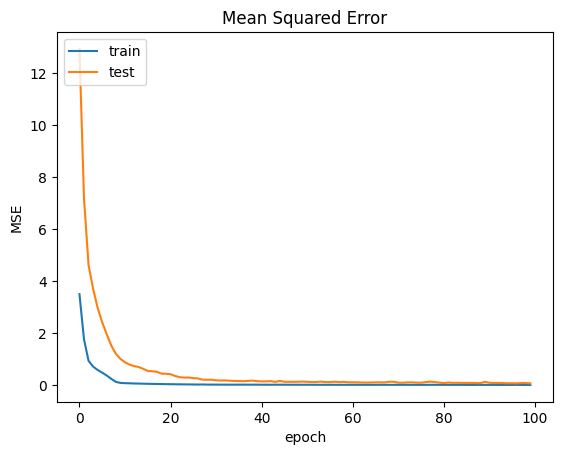

In [22]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

8/8 [==============================] - 0s 2ms/step


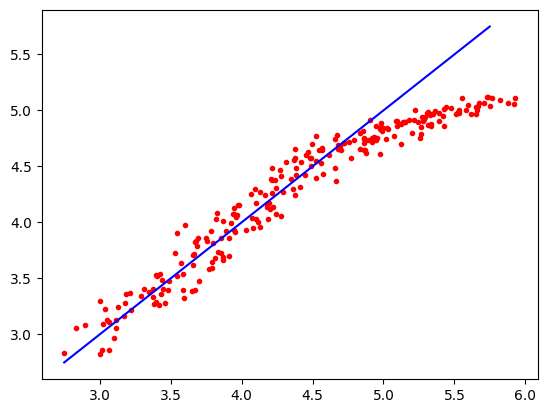

In [23]:
plt.plot(y_test, rnn_mto1_func.predict(x_test), 'r.')
plt.plot(np.arange(min(y_test), max(y_test)), 
         np.arange(min(y_test), max(y_test)), 'b')
plt.show()

8/8 [==============================] - 0s 2ms/step


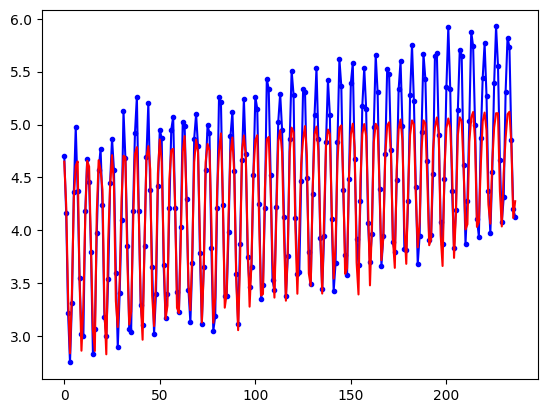

In [24]:
plt.plot(range(y_test.shape[0]), y_test, 'b.-')
plt.plot(range(y_test.shape[0]), rnn_mto1_func.predict(x_test), 'r-')
plt.show()

# LSTM (many-to-one 2)

### Import pacakage

In [1]:
from keras.models import Model
from keras import layers, models

import numpy as np
import matplotlib.pyplot as plt

### Generate Data

In [2]:
def generateData(a, n):
  x_train = []
  y_train = []
  for i in range(len(a)):
    x = a[i: (i+n)]
    if (i+n) < len(a):
      x_train.append(x)
      y_train.append(a[i+n])
    else:
      break
  return np.array(x_train), np.array(y_train)

In [3]:
data = np.sin(2 * np.pi * 0.03 * np.arange(0, 100)) + np.random.random(100)
x, y = generateData(data, 10)
x = x.reshape(-1, 10, 1)
y = y.reshape(-1, 1)

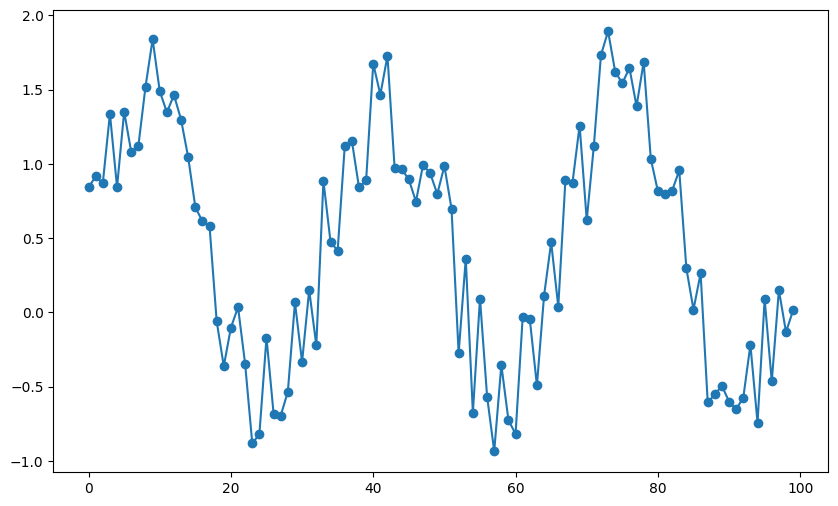

In [12]:
plt.figure(figsize=(10,6))
plt.plot(data[0:100], 'o-')
plt.show()

### Train/Test data splite

In [4]:
x_train = x[:70, :, :]
y_train = y[:70, :]
x_test = x[70:, :, :]
y_test = y[70:, :]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(70, 10, 1)
(70, 1)
(20, 10, 1)
(20, 1)


In [5]:
input_shape = (x_train[0].shape)

input = layers.Input(input_shape)
rnn_layer1 = layers.LSTM(10, return_sequences=True)(input)
rnn_layer2 = layers.LSTM(10, return_sequences=False)(rnn_layer1)
output= layers.Dense(1, activation='linear')(rnn_layer2)

rnn_mto1_func = models.Model(input, output)

rnn_mto1_func.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
rnn_mto1_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 10)            480       
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = rnn_mto1_func.fit(x_train, y_train,
                            validation_data=[x_test, y_test], batch_size=20, epochs=500)

Epoch 1/500
4/4 [==============================] - 10s 268ms/step - loss: 0.9538 - mean_squared_error: 0.9538 - val_loss: 0.3194 - val_mean_squared_error: 0.3194
Epoch 2/500
4/4 [==============================] - 0s 16ms/step - loss: 0.8965 - mean_squared_error: 0.8965 - val_loss: 0.3091 - val_mean_squared_error: 0.3091
Epoch 3/500
4/4 [==============================] - 0s 20ms/step - loss: 0.8479 - mean_squared_error: 0.8479 - val_loss: 0.3022 - val_mean_squared_error: 0.3022
Epoch 4/500
4/4 [==============================] - 0s 18ms/step - loss: 0.8023 - mean_squared_error: 0.8023 - val_loss: 0.2988 - val_mean_squared_error: 0.2988
Epoch 5/500
4/4 [==============================] - 0s 18ms/step - loss: 0.7567 - mean_squared_error: 0.7567 - val_loss: 0.2990 - val_mean_squared_error: 0.2990
Epoch 6/500
4/4 [==============================] - 0s 18ms/step - loss: 0.7098 - mean_squared_error: 0.7098 - val_loss: 0.3039 - val_mean_squared_error: 0.3039
Epoch 7/500
4/4 [=====================

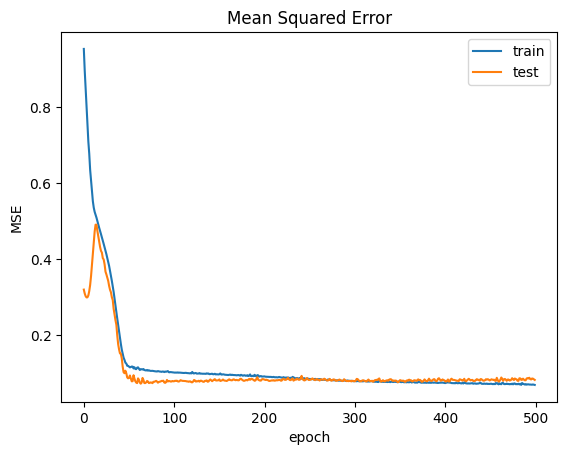

In [14]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [7]:
y_hat = rnn_mto1_func.predict(x_test, batch_size=1)

20/20 [==============================] - 1s 3ms/step


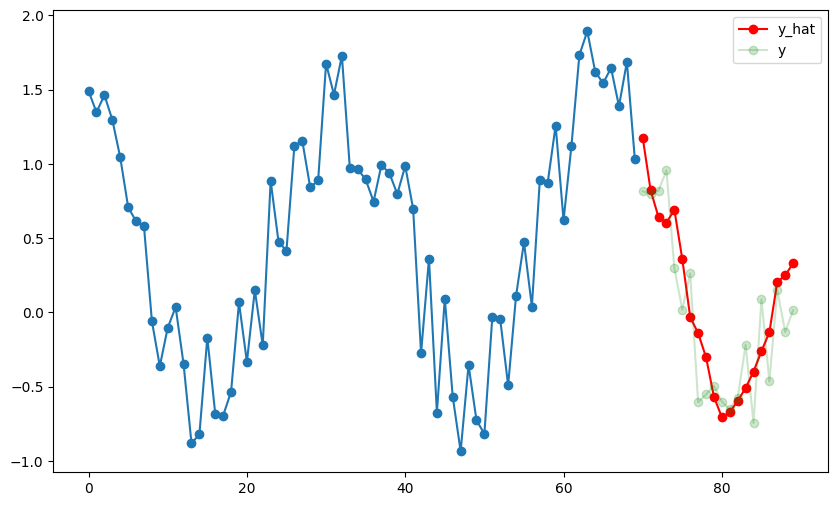

In [8]:
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(70,), 'o-')
plt.plot(b_axis, y_hat.reshape(20,), 'o-', color='red', label='y_hat')
plt.plot(b_axis, y_test.reshape(20,), 'o-', color='green', alpha=0.2, label='y')
plt.legend()
plt.show()